<h1>Code is here https://github.com/dsivakumar/covid-19-India</h1>

<h2>Import</h2>

In [73]:
import json
import requests

import pandas as pd
from pandas.io.json import json_normalize
import datetime

from datetime import datetime


from math import atan2,degrees
import numpy as np

import matplotlib.pyplot as plt

In [74]:
import random
from collections import defaultdict

In [75]:
import sys,warnings

#ignore by message
warnings.filterwarnings("ignore", )

#part of the message is also okay
warnings.filterwarnings("ignore", ) 
warnings.filterwarnings("ignore",)

<h2>Get Data!</h2>

In [76]:
url = "https://api.covid19india.org/states_daily.json"
data = requests.get(url)

In [77]:
content= pd.read_json(data.content)

In [78]:
df=json_normalize(data = content['states_daily'])

<h2>Check the Data </h2>

In [79]:
cols=df.columns[~df.columns.isin(['status','date'])]

In [80]:
df[cols]= df[cols].apply(pd.to_numeric)

In [81]:
df.columns

Index(['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'date', 'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'status', 'tg',
       'tn', 'tr', 'tt', 'un', 'up', 'ut', 'wb'],
      dtype='object')

In [82]:
df.date

0      14-Mar-20
1      14-Mar-20
2      14-Mar-20
3      15-Mar-20
4      15-Mar-20
         ...    
205    21-May-20
206    21-May-20
207    22-May-20
208    22-May-20
209    22-May-20
Name: date, Length: 210, dtype: object

df[['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct',  'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk',  'tg',
       'tn', 'tr', 'tt', 'up', 'ut', 'wb']] = df[['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct',  'dd', 'dl', 'dn',
       'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 'ka', 'kl', 'la', 'ld', 'mh', 'ml',
       'mn', 'mp', 'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk',  'tg',
       'tn', 'tr', 'tt', 'up', 'ut', 'wb']].apply(pd.to_numeric) 

In [83]:
top=['tt','mh','dl','gj', 'rj',  'mp', 'tn','up', 'tg','ap', 'pb',  'wb','ka', 'kl']

In [84]:
title = ["All India",'Maharashtra', 'Delhi', 'Gujarat', 'Rajasthan','Madhya Pradesh',
         'Tamil Nadu', 'Uttar Pradesh','Telengana','Andhra Pradesh','Punjab', "West Bengal",'Karnataka','Kerala']

In [85]:
titles = dict(zip(
    ['tt','mh','dl','gj', 'rj',  'mp', 'tn','up', 'tg','ap', 'pb','wb','ka', 'kl', ],
    ["All India",'Maharashtra', 'Delhi', 'Gujarat', 'Rajasthan','Madhya Pradesh',
         'Tamil Nadu', 'Uttar Pradesh','Telengana','Andhra Pradesh','Punjab', "West Bengal",'Karnataka','Kerala', "West Bengal"]
))

<h2> Process Data! </h2>

In [86]:
df['date'] = pd.to_datetime(df.date)

In [87]:
#df=df[top].apply(pd.to_numeric, errors='coerce', axis=1)

In [88]:
#df = df[df.date != '25-Apr-20']

In [89]:
today = datetime.today().strftime('%b-%d')

<h1>Run the charts</h1>

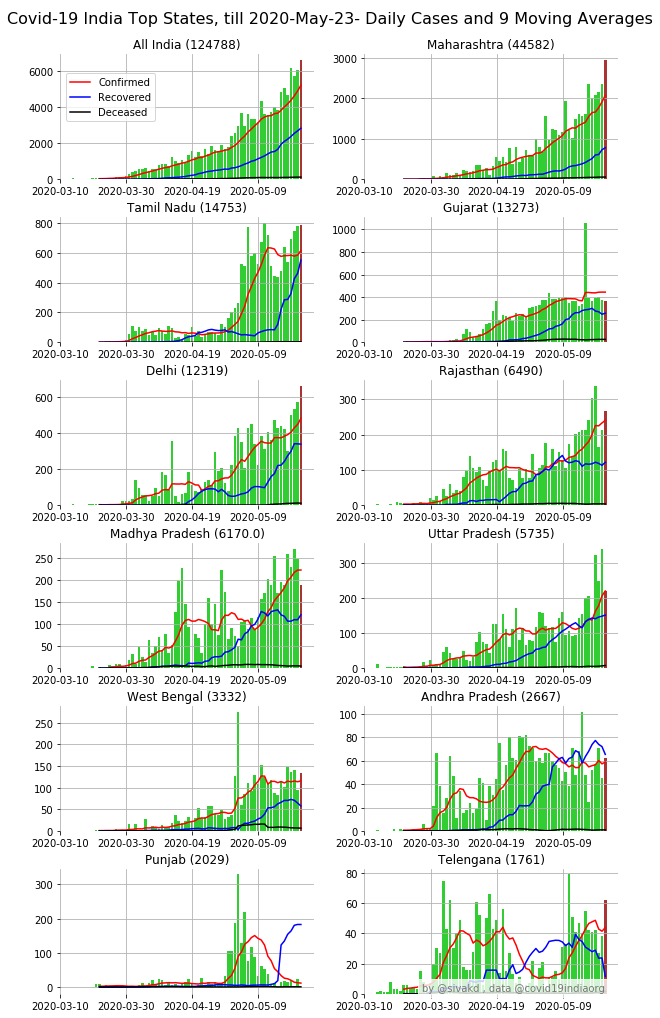

In [90]:
c_df = df.loc[df['status']=='Confirmed']
r_df = df.loc[df['status']=='Recovered']
d_df = df.loc[df['status']=='Deceased']

top=c_df[top].sum().sort_values(ascending=False).index

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,15),  
                                             sharex=False, sharey=False)
i=0
w=9
xis=20
for ax in axes.flatten():
    if(i>len(top)-1):
        break
    d = c_df[top[i]]
    ax.bar(c_df.date,d, color='#32CD32')
    
    y_av =c_df[top[i]].rolling(window = w).mean()
    l1, = ax.plot(c_df.date,y_av, 'r')
    
    y_av =r_df[top[i]].rolling(window = w).mean()
    l2, = ax.plot(r_df.date,y_av, 'b')
    
    y_av =d_df[top[i]].rolling(window=  w).mean()
    l3, = ax.plot(d_df.date,y_av, 'black')
    ax.set_facecolor('#fcfcf2') 
    startx, endx = ax.get_xlim()
    starty, endy = ax.get_ylim()
    ax.xaxis.set_ticks(np.arange(startx, endx, xis))
    #ax.set_facecolor('#eefff5')
    ax.grid(axis='y')
    ax.grid(axis='x')
    ax.patches[-1].set_facecolor('#aa3333')
    ax.set_frame_on(False)
    #ax.text(endx/2-5, endy/2-2, top[i], fontsize=12)
    ax.title.set_text(titles[top[i]]+' ('+np.str(d.sum())+')')
    i=i+1



ax.text(0.95, 0.02, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=None, hspace=0.3)
fig.suptitle("Covid-19 India Top States, till 2020-"+today+ "- Daily Cases and "+np.str(w)+" Moving Averages",size=16,y=0.92)

fig.legend(handles = [l1,l2,l3] , labels=['Confirmed','Recovered', 'Deceased'],loc=(0.1,0.88))

#plt.draw()
plt.savefig("covid-top-states-"+today+".png",bbox_inches = "tight")
plt.show()

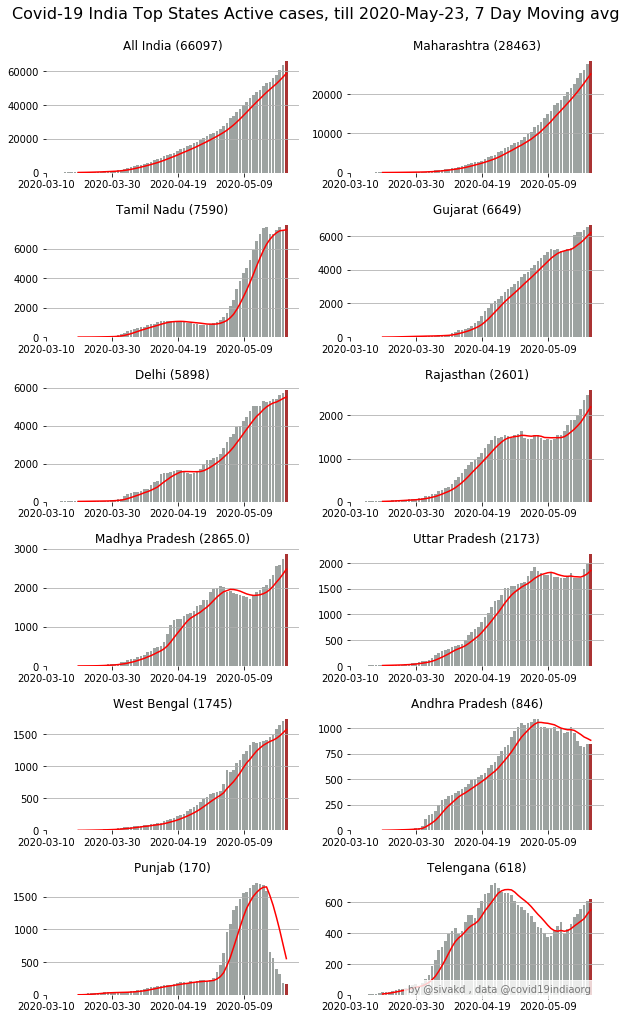

In [110]:
c_df = df.loc[df['status']=='Confirmed']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,15),  
                                             sharex=False, sharey=False)
i=0
w=7
for ax in axes.flatten():

    mh=df[[top[i],'status','date']]
    odt=0
    asum=0
    mh['date'] = pd.to_datetime(mh.date)
    fd=mh.date[0]
    for dt in mh.date:
        if(dt == odt):
            continue
        dd = mh.loc[mh.date==dt]
        sumc = mh.loc[(mh['status'] == 'Confirmed') & (mh['date'] < dt)][top[i]].sum()
        sumd = mh.loc[(mh['status'] == 'Deceased') & (mh['date'] < dt)][top[i]].sum()
        sumr = mh.loc[(mh['status'] == 'Recovered') & (mh['date'] < dt)][top[i]].sum()
        a = sumc-sumd-sumr
        mh=mh.append({'date':dt, 'status': 'Active', top[i]:a},ignore_index=True)
        
        odt=dt
        asum=a
    #mh.date=np.datetime64(mh.date)
    a_df = mh.loc[mh['status']=='Active']
    #ax.set_yscale('log')
    y_v = a_df[top[i]]#.rolling(window=7).mean()
    ax.bar(a_df.date,y_v,color='#9da3a1')
    y_av = a_df[top[i]].rolling(window=w).mean()
    #y_av = [a_df.loc[a_df.date<d].mean()[0] for d in a_df.date]
    ax.plot(a_df.date,y_av,color='red')
    ax.set_facecolor('#fcfcf2') 
    startx, endx = ax.get_xlim()
    starty, endy = ax.get_ylim()
    ax.xaxis.set_ticks(np.arange(startx, endx, xis))
    ax.grid(axis='y')
    ax.patches[-1].set_facecolor('#aa3333')
    ax.set_frame_on(False)
    #ax.text(endx/2-5, endy/2-2, top[i], fontsize=12)
    ax.title.set_text(titles[top[i]]+' ('+np.str(y_v.iloc[-1])+')')
    i=i+1
#fig.suptitle("Covid-19, India: Top States, 2020-My-01",size=16,y=0.95)
plt.text(0.95, 0.02, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=None, hspace=0.4)
fig.suptitle("Covid-19 India Top States Active cases, till 2020-"+ today + ", "+np.str(w)+ " Day Moving avg",size=16,y=0.925)
#plt.draw()
plt.savefig("covid-top-states-active-"+ today+".png",bbox_inches = "tight")
plt.show()

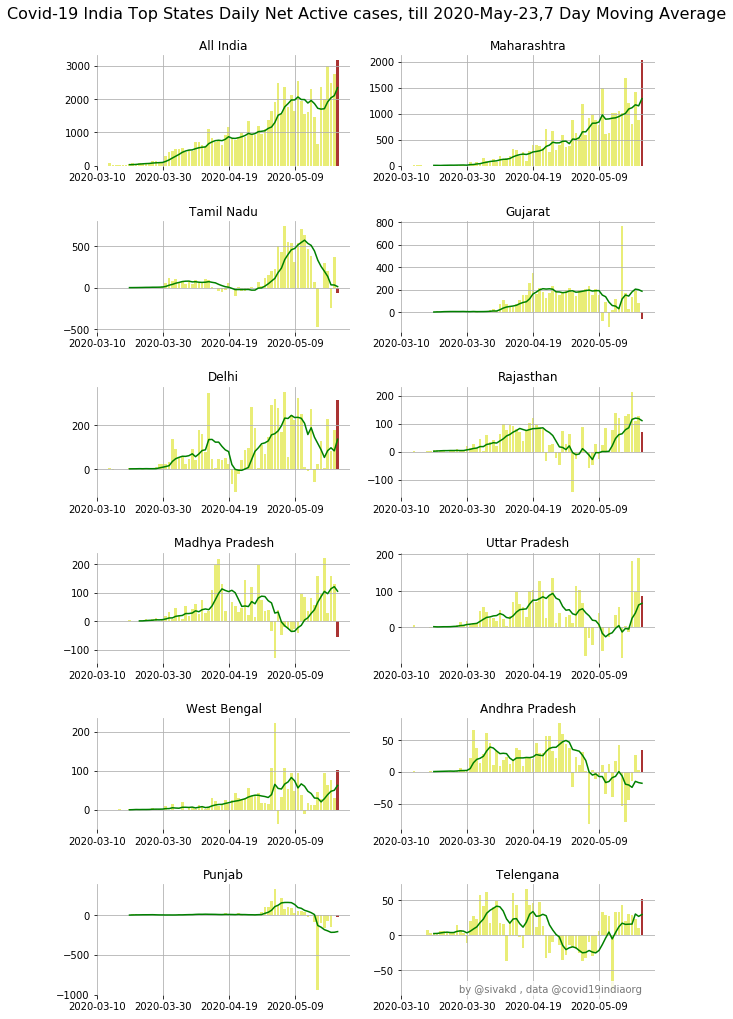

In [111]:
c_df = df.loc[df['status']=='Confirmed']

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10,15),  
                                             sharex=False, sharey=False)
i=0
w=7
for ax in axes.flatten():

    mh=df[[top[i],'status','date']]
    odt=0
    asum=0
    mh['date'] = pd.to_datetime(mh.date)
    fd=mh.date[0]
    for dt in mh.date:
        if(dt == odt):
            continue
        dd = mh.loc[mh.date==dt]
        c = mh.loc[(mh['status'] == 'Confirmed') & (mh['date'] == dt)][top[i]]#.sum()
        d = mh.loc[(mh['status'] == 'Deceased') & (mh['date'] == dt)][top[i]]#.sum()
        r = mh.loc[(mh['status'] == 'Recovered') & (mh['date'] == dt)][top[i]]#.sum()
        net = c.values[0]-d.values[0]-r.values[0]
        mh=mh.append({'date':dt, 'status': 'Net', top[i]:net},ignore_index=True)
        odt=dt

    #mh.date=np.datetime64(mh.date)
    a_df = mh.loc[mh['status']=='Net']
    #ax.set_yscale('log')
    y_v = a_df[top[i]]#.rolling(window=7).mean()
    ax.bar(a_df.date,y_v,color='#e9ed77') ##c7f0b4
    y_av = a_df[top[i]].rolling(window=w).mean()
    #y_av = [a_df.loc[a_df.date<d].mean()[0] for d in a_df.date]
    #y_av = a_df[top[i]]
    ax.plot(a_df.date,y_av,color='green')
    ax.set_facecolor('#fcfcf2')    
    startx, endx = ax.get_xlim()
    starty, endy = ax.get_ylim()
    ax.xaxis.set_ticks(np.arange(startx, endx, xis))
    ax.grid(axis='y')
    ax.grid(axis='x')
    ax.patches[-1].set_facecolor('#aa3333')
    #ax.text(endx/2-5, endy/2-2, top[i], fontsize=12)
    ax.title.set_text(titles[top[i]])#+' ('+np.str(y_v.sum())+')')
    ax.set_frame_on(False)
    i=i+1

#fig.suptitle("Covid-19, India: Top States, Net Active cases 2020-Apr-30",size=16,y=0.95)
plt.text(0.95, 0.02, 'by @sivakd , data @covid19indiaorg', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

plt.subplots_adjust(left=None, bottom=0.01, right=None, top=None, wspace=None, hspace=0.5)
fig.suptitle("Covid-19 India Top States Daily Net Active cases, till 2020-"+today+","+np.str(w)+" Day Moving Average",size=16,y=0.925)
plt.savefig("covid-top-states-net-active-"+today+".png",bbox_inches = "tight")
plt.show()

In [93]:
c_df[top].sum().sort_values(ascending=False).index

Index(['tt', 'mh', 'tn', 'gj', 'dl', 'rj', 'mp', 'up', 'wb', 'ap', 'pb', 'tg',
       'ka', 'kl'],
      dtype='object')

In [94]:
mh=df[['rj','status','date']]

In [95]:
c = mh.loc[(mh['status'] == 'Confirmed') & (mh['date'] == dt)]['rj']#.sum()
d = mh.loc[(mh['status'] == 'Deceased') & (mh['date'] == dt)]['rj']#.sum()
r = mh.loc[(mh['status'] == 'Recovered') & (mh['date'] == dt)]['rj']#.sum()

In [96]:
c

207    267
Name: rj, dtype: int64